# I. Import library

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [2]:
# Các thư viện cơ bản
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Tiền xử lý dữ liệu và Feature Selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_classif,RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import statsmodels.api as sm

# Xử lý vấn đề imbalance
from imblearn.over_sampling import SMOTE

# Mô hình học máy cơ bản và các thư viện đánh giá hiệu suất
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Đánh giá mô hình
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

# Thư viện Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# II. Import Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train_org = pd.read_csv(r'/content/drive/MyDrive/xàm/train.csv')
df_train =df_train_org.copy()
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [5]:
df_test_org = pd.read_csv(r'/content/drive/MyDrive/xàm/test.csv')
df_test =df_test_org.copy()
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# III. Basic Explorations

In [6]:
num_train_rows, num_train_columns = df_train.shape
num_test_rows, num_test_columns = df_test.shape

print('Train Data:')
print('Number of Rows: ', num_train_rows)
print('Number of Columns: ', num_train_columns)
print("-"*15)
print('Test Data:')
print('Number of Rows: ', num_test_rows)
print('Number of Columns: ', num_test_columns)

Train Data:
Number of Rows:  165034
Number of Columns:  14
---------------
Test Data:
Number of Rows:  110023
Number of Columns:  13


In [7]:
train_nulls = df_train.isnull().sum().sum()
test_nulls = df_test.isnull().sum().sum()

print('Train Data Nulls: ', train_nulls)
print('Test Data Nulls: ', test_nulls)

Train Data Nulls:  0
Test Data Nulls:  0


In [8]:
train_duplicated = df_train.duplicated().sum()
test_duplicated = df_test.duplicated().sum()
id_duplicated = df_train['id'].nunique() - num_train_rows

print('Train Data Duplicated: ', train_duplicated)
print('Test Data Duplicated: ', test_duplicated)
print('ID Duplicated: ', id_duplicated)

Train Data Duplicated:  0
Test Data Duplicated:  0
ID Duplicated:  0


In [9]:
train_info = df_train.info()
test_info = df_test.info()

print('Train Data Info:')
print(train_info)
print('-'*15)
print('Test Data Info:')
print(test_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110

## 3.1 Quick Note  
### 3.1.1 Train Dataset:  
- The 'Age' column is in the wrong format. I have checked in Excel and found some values like "36,44".  
- The 'HasCrCard' and 'IsActiveMember' columns are in the wrong format, but no incorrect values were found.  
### 3.1.2 Test Dataset:  
- Needs the same fixes as noted above.
## 3.2 Fix Mistakes
### 3.2.1 Age col
- Use Round()


In [10]:
df_age_train = df_train['Age'].unique()
df_age_test = df_test['Age'].unique()

print('Train Data Age: ', df_age_train)
print('Train Data AGe Count: ', len(df_age_train))
print('Test Data Age: ', df_age_test)
print('Test Data Age Count: ', len(df_age_test))

Train Data Age:  [33.   40.   34.   36.   30.   37.   43.   27.   71.   47.   25.   55.
 61.   35.   41.   44.   26.   39.   31.   58.   49.   32.   50.   28.
 45.   52.   29.   38.   54.   56.   46.   42.   64.   20.   21.   23.
 48.   59.   51.   24.   53.   62.   57.   22.   66.   67.   19.   73.
 60.   63.   65.   75.   68.   69.   76.   18.   70.   81.   74.   72.
 77.   82.   79.   92.   80.   78.   83.   36.44 85.   32.34 84.  ]
Train Data AGe Count:  71
Test Data Age:  [23.   46.   34.   36.   38.   22.   45.   47.   30.   33.   42.   43.
 24.   31.   29.   32.   35.   37.   52.   40.   39.   44.   27.   26.
 56.   49.   41.   59.   60.   55.   28.   48.   53.   51.   54.   61.
 25.   72.   67.   50.   58.   69.   21.   74.   19.   66.   71.   57.
 65.   63.   18.   64.   62.   78.   20.   75.   79.   77.   70.   45.25
 76.   68.   73.   80.   84.   92.   81.   82.   32.34 85.   83.   36.44
 48.64 88.  ]
Test Data Age Count:  74


In [11]:
filtered_records_train = df_train[df_train['Age'].isin([36.44, 32.34])]
filtered_records_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
48694,48694,15672516,Young,756,France,Male,36.44,1,134250.17,1,0.0,1.0,170041.95,0
125279,125279,15597945,Dellucci,619,Spain,Female,32.34,8,0.00,2,1.0,0.0,138555.46,0


In [12]:
filtered_records_test = df_test[df_test['Age'].isin([45.25, 32.34, 36.44, 48.64])]
filtered_records_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4928,169962,15691871,Muldrow,587,Spain,Male,45.25,6,0.00,1,0.0,1.0,158684.81
25808,190842,15677049,Price,636,Spain,Female,32.34,8,0.00,1,1.0,0.0,138555.46
36213,201247,15758081,Dellucci,636,France,Male,32.34,8,0.00,2,1.0,0.0,138555.46
63688,228722,15603830,Palmer,635,Spain,Male,36.44,4,0.00,1,0.0,0.0,170041.95
80426,245460,15781569,Tung,679,Spain,Male,48.64,10,0.00,2,1.0,1.0,84790.44
87963,252997,15661507,Muldrow,587,France,Male,45.25,6,0.00,1,0.0,0.0,158684.81
95274,260308,15794187,Chienezie,689,France,Female,36.44,9,0.00,2,0.0,1.0,9241.52
104759,269793,15692991,Hsing,613,Spain,Female,32.34,2,0.00,2,1.0,0.0,138555.46
105464,270498,15716186,Chiemenam,592,France,Female,32.34,4,187841.99,2,0.0,0.0,146041.45


In [13]:
df_train['Age'] = df_train['Age'].round(0)
df_test['Age'] = df_test['Age'].round(0)

len_train_after = len(df_train['Age'].unique())
len_test_after = len(df_test['Age'].unique())

print('Train Data Age Count After: ', len_train_after)
print('Test Data Age Count After: ', len_test_after)

Train Data Age Count After:  69
Test Data Age Count After:  70


In [14]:
df_train['Age'] = df_train['Age'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)

### 3.2.2 Other Cols

In [15]:
df_train['HasCrCard'] = df_train['HasCrCard'].astype(int)
df_train['IsActiveMember'] = df_train['IsActiveMember'].astype(int)

df_test['HasCrCard'] = df_test['HasCrCard'].astype(int)
df_test['IsActiveMember'] = df_test['IsActiveMember'].astype(int)

# IV. EDA 'TRAIN DATA'

In [16]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125883,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867207,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


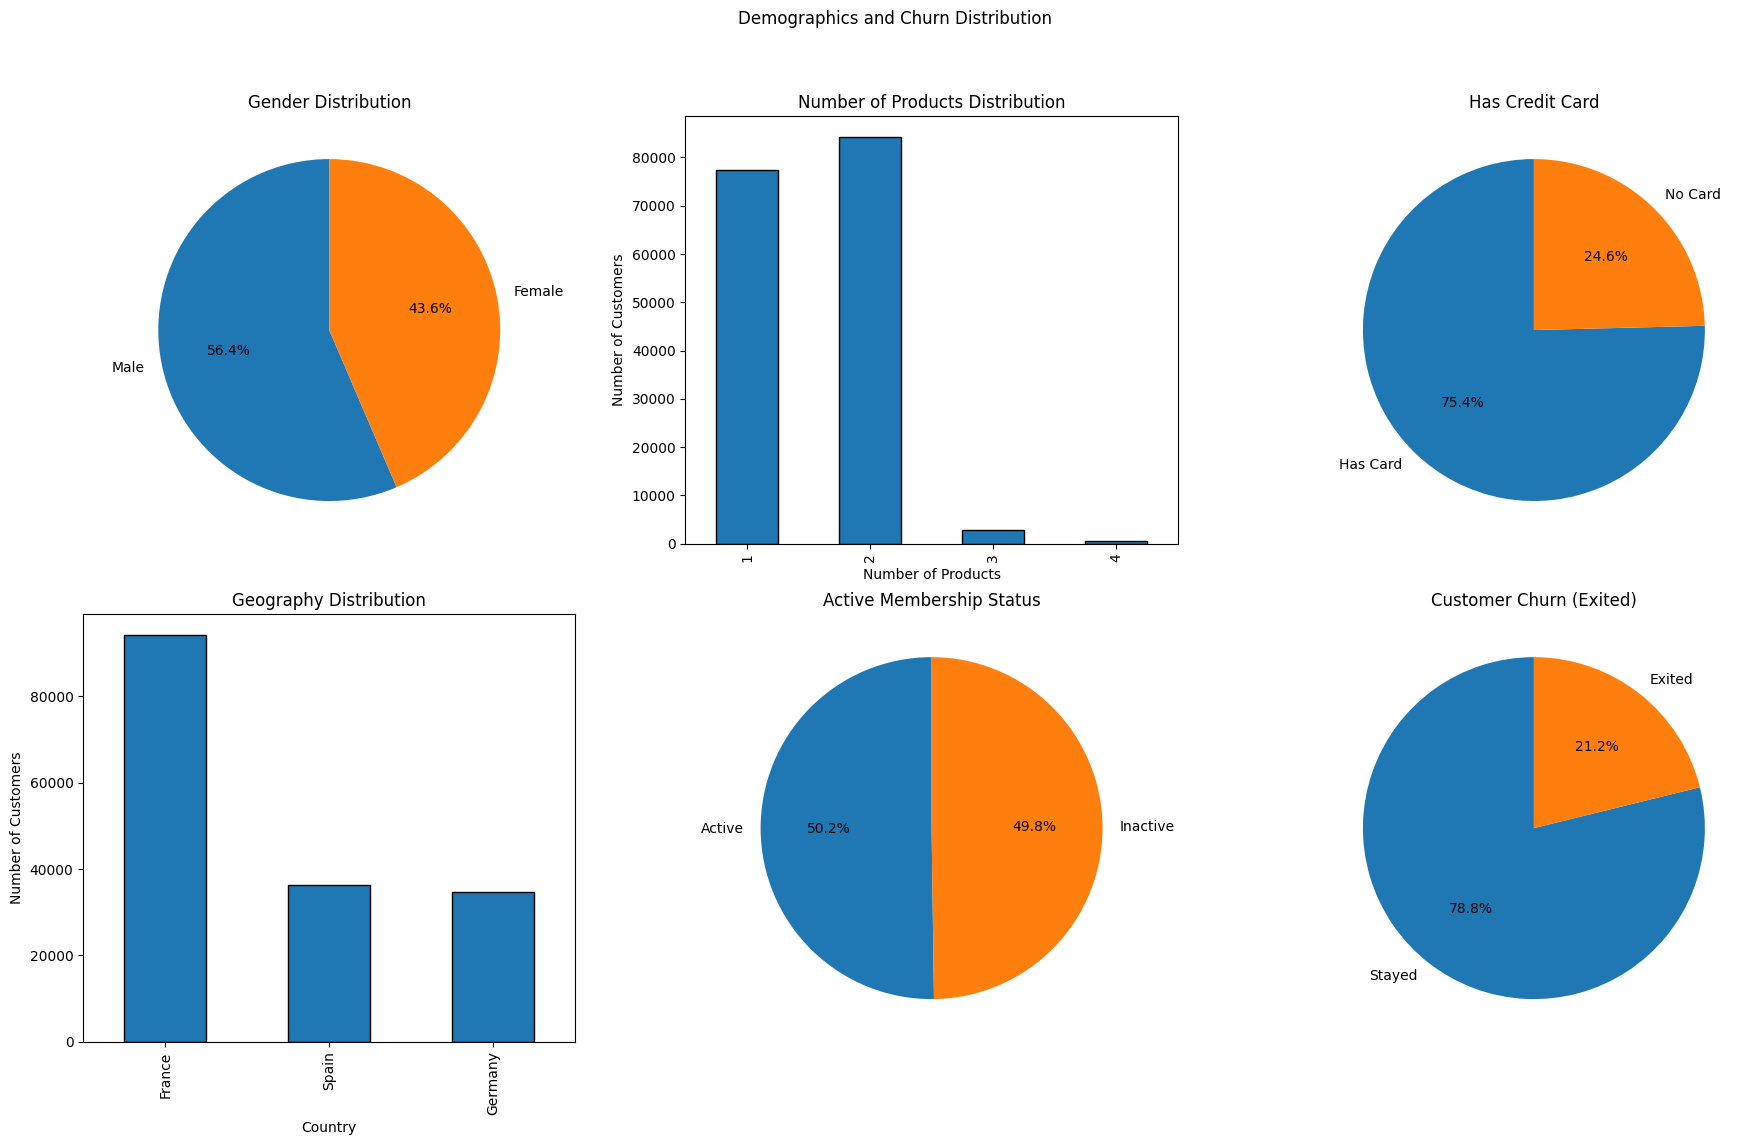

In [17]:
# Adding a bar chart for 'Geography' distribution to the existing subplots.

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# 1. Gender Distribution - Pie Chart
df_train['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[0, 0])
axs[0, 0].set_title("Gender Distribution")
axs[0, 0].set_ylabel("")

# 2. Number of Products - Bar Chart
df_train['NumOfProducts'].value_counts().sort_index().plot(kind='bar', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title("Number of Products Distribution")
axs[0, 1].set_xlabel("Number of Products")
axs[0, 1].set_ylabel("Number of Customers")

# 3. Has Credit Card - Pie Chart
df_train['HasCrCard'].value_counts().plot(kind='pie', labels=['Has Card', 'No Card'], autopct='%1.1f%%', startangle=90, ax=axs[0, 2])
axs[0, 2].set_title("Has Credit Card")
axs[0, 2].set_ylabel("")

# 4. Geography Distribution - Bar Chart
df_train['Geography'].value_counts().plot(kind='bar', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title("Geography Distribution")
axs[1, 0].set_xlabel("Country")
axs[1, 0].set_ylabel("Number of Customers")

# 5. Is Active Member - Pie Chart
df_train['IsActiveMember'].value_counts().plot(kind='pie', labels=['Active', 'Inactive'], autopct='%1.1f%%', startangle=90, ax=axs[1, 1])
axs[1, 1].set_title("Active Membership Status")
axs[1, 1].set_ylabel("")

# 6. Exited - Pie Chart
df_train['Exited'].value_counts().plot(kind='pie', labels=['Stayed', 'Exited'], autopct='%1.1f%%', startangle=90, ax=axs[1, 2])
axs[1, 2].set_title("Customer Churn (Exited)")
axs[1, 2].set_ylabel("")

plt.suptitle("Demographics and Churn Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


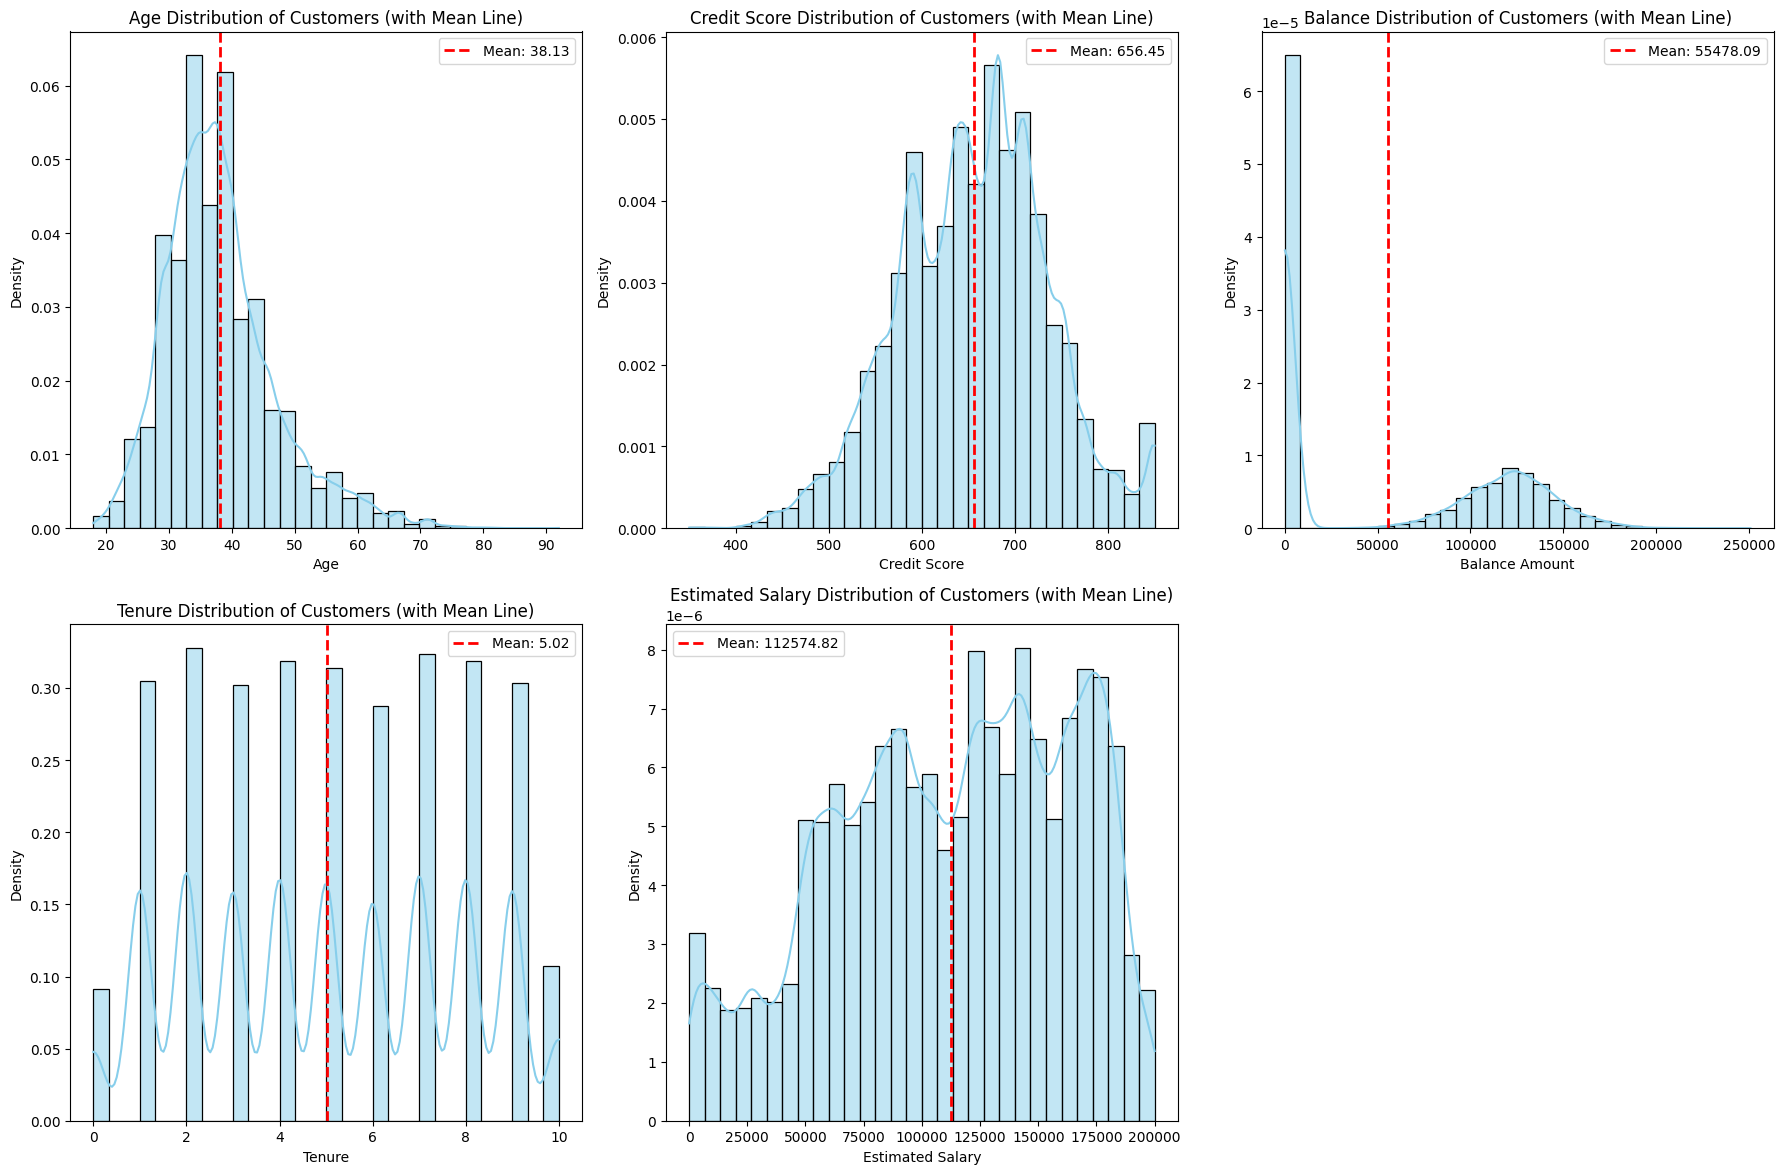

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
columns = ['Age', 'CreditScore', 'Balance', 'Tenure', 'EstimatedSalary']
titles = [
    "Age Distribution of Customers (with Mean Line)",
    "Credit Score Distribution of Customers (with Mean Line)",
    "Balance Distribution of Customers (with Mean Line)",
    "Tenure Distribution of Customers (with Mean Line)",
    "Estimated Salary Distribution of Customers (with Mean Line)"
]
xlabels = ["Age", "Credit Score", "Balance Amount", "Tenure", "Estimated Salary"]

for i, (col, title, xlabel) in enumerate(zip(columns, titles, xlabels)):
    ax = axs[i // 3, i % 3]
    sns.histplot(df_train[col], kde=True, bins=30, edgecolor='black', color="skyblue", stat="density", ax=ax)
    mean_value = df_train[col].mean()
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Density")
    ax.legend()

if len(columns) % 3 != 0:
    axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


### 1. **General Summary of Findings**

   - The customer demographic mainly consists of middle-aged individuals with moderate credit scores and a preference for basic banking products.
   - There’s a balanced gender distribution, with slight male dominance, and about half the customer base is actively engaged.
   - Approximately 21% of customers have exited, which is a significant churn rate.

### 2. **Detailed Insights for Each Chart**

#### Numerical Distributions

- **Age Distribution**: The majority of customers are in the 30-40 age range, with a mean age of 38.13. The distribution skews slightly right, with fewer customers in the higher age brackets. There are minimal outliers in terms of very young or very old ages, suggesting a concentrated customer base.

- **Credit Score Distribution**: Most customers have a credit score around 600-700, with a mean of 656.45. The distribution is fairly symmetric with mild skewness. Outliers exist at the lower and higher ends of the credit spectrum, indicating a few customers with particularly poor or excellent credit.

- **Balance Distribution**: A significant proportion of customers have zero balance, followed by a group centered around 100,000. The mean balance is 55,478, heavily influenced by the zero-balance customers. This zero-balance group could be considered outliers if they are meant to hold funds but do not.

- **Tenure Distribution**: Tenure values are evenly spread from 0 to 10, with a mean of 5.02, suggesting a diverse range of customer durations with the bank. No significant outliers in tenure are observed due to its capped range.

- **Estimated Salary Distribution**: Customer salaries are spread fairly evenly, with a mean of 112,574.82. The right tail includes higher salary outliers, indicating some customers with substantially higher earnings.

#### Categorical Distributions

- **Gender Distribution**: The gender distribution shows 56.4% male and 43.6% female, suggesting a relatively balanced customer base.

- **Number of Products**: Most customers hold either 1 or 2 products, with very few holding 3 or 4. This limited engagement with additional products may suggest opportunities for cross-selling. The small groups with 3 or 4 products could be considered outliers in terms of engagement.

- **Has Credit Card**: A majority (75.4%) of customers have credit cards. This high proportion suggests that having a credit card is common among the customer base.

- **Is Active Member**: Nearly an even split between active (50.2%) and inactive (49.8%) members suggests that engagement could be a critical factor to monitor, especially given the churn rate.

- **Customer Churn (Exited)**: About 21.2% of customers have exited, indicating a substantial churn rate. This suggests a need for analysis on factors contributing to churn to improve retention.

These insights give an overview of customer characteristics and potential areas for retention efforts and engagement enhancements.

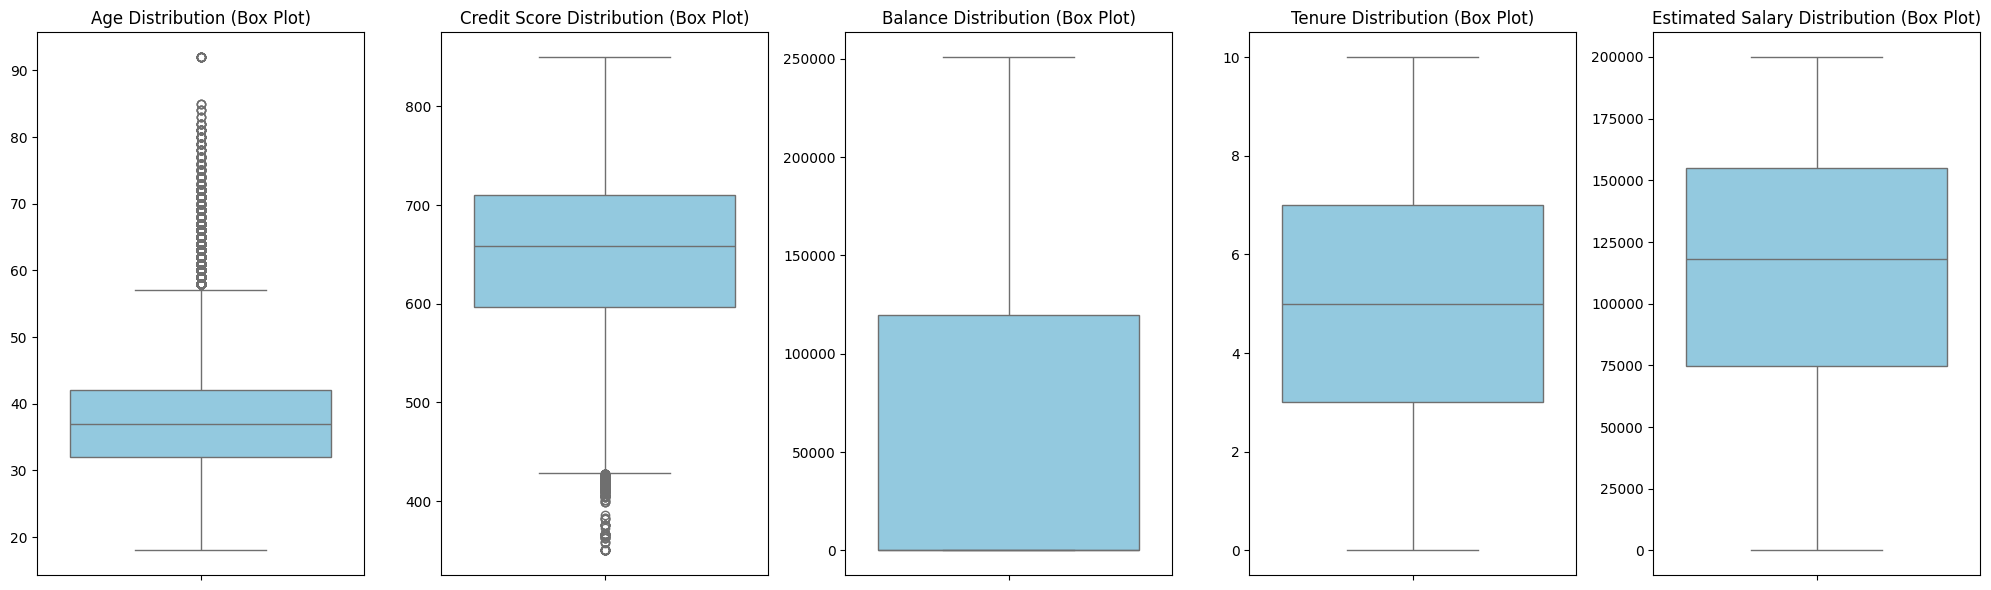

In [19]:
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

columns = ['Age', 'CreditScore', 'Balance', 'Tenure', 'EstimatedSalary']
titles = [
    "Age Distribution (Box Plot)",
    "Credit Score Distribution (Box Plot)",
    "Balance Distribution (Box Plot)",
    "Tenure Distribution (Box Plot)",
    "Estimated Salary Distribution (Box Plot)"
]

for i, (col, title) in enumerate(zip(columns, titles)):
    sns.boxplot(data=df_train, y=col, ax=axs[i], color="skyblue")
    axs[i].set_title(title)
    axs[i].set_ylabel("")

plt.tight_layout()
plt.show()


Percentage of Age Outliers: 3.87%
Percentage of Credit Score Outliers: 0.15%
--------------------
Age Outliers Summary:
             Balance       Tenure       Exited
count    6394.000000  6394.000000  6394.000000
mean    60458.138894     4.914138     0.383797
std     63592.020665     2.849471     0.486348
min         0.000000     0.000000     0.000000
25%         0.000000     2.000000     0.000000
50%         0.000000     5.000000     0.000000
75%    121845.487500     7.000000     1.000000
max    216109.880000    10.000000     1.000000
Churn Rate for Age Outliers: 38.38%
--------------------

Credit Score Outliers Summary:
             Balance      Tenure      Exited
count     253.000000  253.000000  253.000000
mean    53693.156245    5.276680    0.225296
std     62931.734036    3.067128    0.418606
min         0.000000    0.000000    0.000000
25%         0.000000    2.000000    0.000000
50%         0.000000    5.000000    0.000000
75%    117183.740000    8.000000    0.000000
max    2

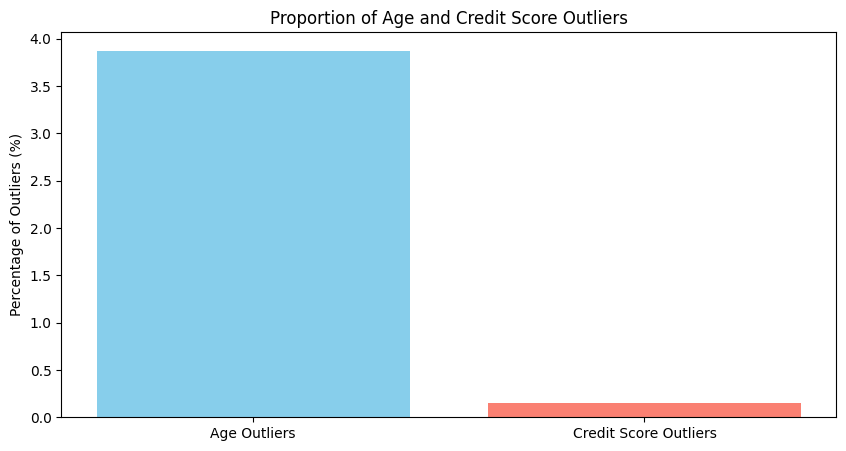

In [20]:
def identify_outliers(data, column):
    """Identify outliers using the IQR method for a given column."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers for 'Age' and 'CreditScore'
age_outliers, age_lower_bound, age_upper_bound = identify_outliers(df_train, 'Age')
credit_score_outliers, cs_lower_bound, cs_upper_bound = identify_outliers(df_train, 'CreditScore')

# Calculate percentage of outliers
age_outliers_percentage = len(age_outliers) / len(df_train) * 100
credit_score_outliers_percentage = len(credit_score_outliers) / len(df_train) * 100
print(f"Percentage of Age Outliers: {age_outliers_percentage:.2f}%")
print(f"Percentage of Credit Score Outliers: {credit_score_outliers_percentage:.2f}%")
print('-'*20)
# Summarize balance, tenure, and churn rate for age and credit score outliers
age_outliers_summary = age_outliers[['Balance', 'Tenure', 'Exited']].describe()
age_churn_rate = age_outliers['Exited'].mean() * 100
print("Age Outliers Summary:")
print(age_outliers_summary)
print(f"Churn Rate for Age Outliers: {age_churn_rate:.2f}%")
print('-'*20)
credit_score_outliers_summary = credit_score_outliers[['Balance', 'Tenure', 'Exited']].describe()
cs_churn_rate = credit_score_outliers['Exited'].mean() * 100
print("\nCredit Score Outliers Summary:")
print(credit_score_outliers_summary)
print(f"Churn Rate for Credit Score Outliers: {cs_churn_rate:.2f}%")
print('-'*20)
plt.figure(figsize=(10, 5))
plt.bar(['Age Outliers', 'Credit Score Outliers'], [age_outliers_percentage, credit_score_outliers_percentage], color=['skyblue', 'salmon'])
plt.ylabel('Percentage of Outliers (%)')
plt.title('Proportion of Age and Credit Score Outliers')
plt.show()


### 1. **Age Outliers**
   - **Churn Rate**: Age outliers (approximately 3.87% of the data) have a high churn rate of 38.38%, indicating they are a unique group that behaves differently from the main customer base.
   - **Insight Value**: The higher churn rate suggests that these age outliers could provide valuable insights for understanding customer churn, especially if the business wants to address or prevent churn among older or very young customers.

### 2. **Credit Score Outliers**
   - **Churn Rate**: Credit score outliers are rare (only 0.15% of data) and show a churn rate close to the overall rate (22.53%), suggesting they don’t differ significantly in churn behavior.
   - **Impact on Analysis**: Since they constitute a very small portion of the data and do not significantly influence churn, their presence is unlikely to impact broader insights or predictive modeling results.
   - có thể kiểm tra sâu hơn kiểu số ít này có đóng góp tiền nhiều ko, mà thường score thấp thì hên xui nhưng mà vẫn cứ giữ

In [21]:
# Calculating churn rate (Exited) for each age group
age_75th_percentile = df_train['Age'].quantile(0.75)

# Creating two subsets based on the age threshold
above_75_age = df_train[df_train['Age'] >= age_75th_percentile]
below_75_age = df_train[df_train['Age'] < age_75th_percentile]

# Calculating churn rates
above_75_churn_rate = above_75_age['Exited'].mean()
below_75_churn_rate = below_75_age['Exited'].mean()

above_75_churn_rate, below_75_churn_rate


(0.459776633801588, 0.11614229381659535)

Tỷ lệ churn giữa hai nhóm tuổi có sự khác biệt đáng kể:

- **Nhóm trên 75% tuổi (≥ ngưỡng 75%)**: Tỷ lệ churn là khoảng **45.98%**.
- **Nhóm dưới 75% tuổi (< ngưỡng 75%)**: Tỷ lệ churn là khoảng **11.61%**.

### Nhận định
Sự khác biệt này là khá rõ rệt, cho thấy nhóm khách hàng lớn tuổi hơn có tỷ lệ churn cao hơn đáng kể so với nhóm trẻ hơn. **Việc chia nhóm theo tuổi có thể hữu ích**, vì nhóm khách hàng cao tuổi có xu hướng churn nhiều hơn và có thể mang các đặc điểm khác biệt trong hành vi hoặc nhu cầu..

In [22]:
zero_balance_churn_rate = df_train[df_train['Balance'] == 0]['Exited'].value_counts(normalize=True)

zero_balance_churn_rate


,proportion
Exited,
0,0.838346
1,0.161654


In [23]:
zero_balance_churn_rate = df_train[df_train['Balance'] > 0]['Exited'].value_counts(normalize=True)

zero_balance_churn_rate


,proportion
Exited,
0,0.729008
1,0.270992


Since a significant portion of customers with zero balance did not churn, retaining these records could provide valuable insight into customer behavior. If further analysis reveals patterns specific to these customers (e.g., they may have unique characteristics affecting their loyalty), this group can offer useful information for targeted interventions.

### Z.Score

# V. Preprocessing Data

In [24]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0


In [25]:
df_train.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [26]:
# Replace column 'Age' where 1 indicates Age >= 75th percentile and 0 otherwise
df_train['Age'] = (df_train['Age'] >= age_75th_percentile).astype(int)

In [27]:
label_encoder = LabelEncoder()
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])
df_train['Geography'] = label_encoder.fit_transform(df_train['Geography'])

# StandardScaler for 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'
standard_scaler = StandardScaler()
df_train[['CreditScore', 'Balance', 'EstimatedSalary']] = standard_scaler.fit_transform(
    df_train[['CreditScore', 'Balance', 'EstimatedSalary']]
)

# MinMaxScaler for 'Tenure'
minmax_scaler = MinMaxScaler()
df_train['Tenure'] = minmax_scaler.fit_transform(df_train[['Tenure']])
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.144135,0,1,0,0.3,-0.883163,2,1,0,1.369486,0
1,-0.367706,0,1,0,0.1,-0.883163,2,1,1,-1.254085,0
2,0.268974,0,1,0,1.0,-0.883163,2,1,0,1.437422,0
3,-0.941966,0,1,0,0.2,1.486918,1,1,1,-0.557018,0
4,0.743362,2,1,0,0.5,-0.883163,2,1,1,-1.938770,0


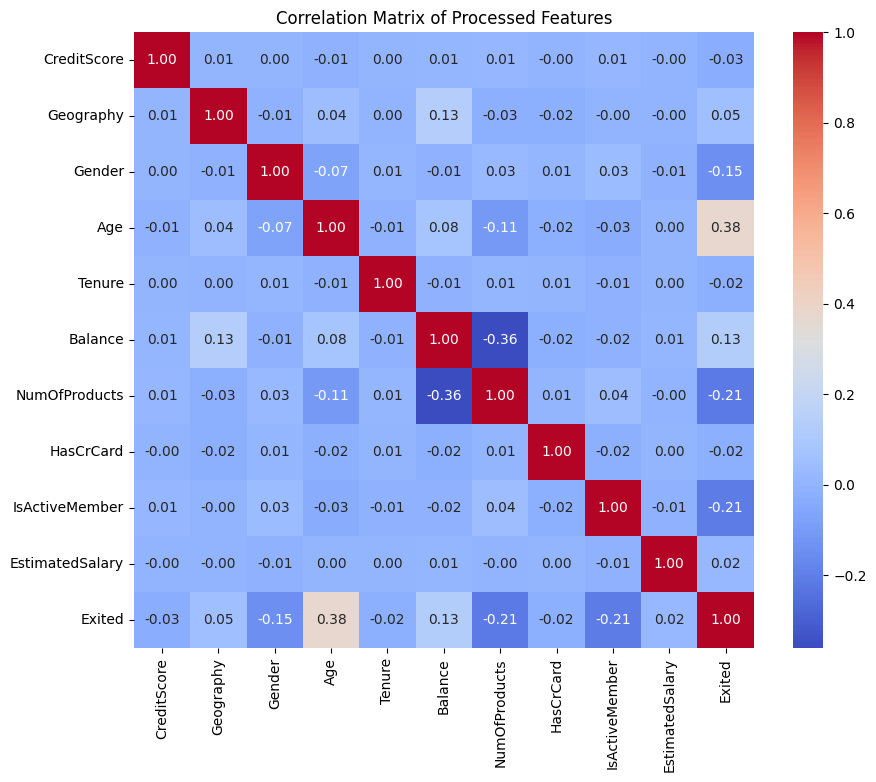

In [28]:
# Correlation matrix
correlation_matrix = df_train.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Processed Features")
plt.show()

## 5.1 Variance Inflation Factor (VIF) for multicollinearity

In [29]:
# Calculating Variance Inflation Factor (VIF) for multicollinearity
# Dropping the target variable 'Exited' for VIF calculation
X = df_train.drop(columns=['Exited'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả
print("VIF Data:")
print(vif_data)


VIF Data:
           Feature       VIF
0      CreditScore  1.000505
1        Geography  1.619701
2           Gender  2.174029
3              Age  1.339768
4           Tenure  3.540171
5          Balance  1.114162
6    NumOfProducts  5.671969
7        HasCrCard  3.421607
8   IsActiveMember  1.913223
9  EstimatedSalary  1.000236


### Nhận định về đa cộng tuyến và mức độ độc lập

- **Đa cộng tuyến**: VIF (Variance Inflation Factor) thường được sử dụng để đánh giá mức độ đa cộng tuyến. Một VIF dưới 5 thường được coi là mức chấp nhận được và cho thấy biến độc lập với các biến khác một cách tương đối.
  - Các biến trong dữ liệu của bạn đều có VIF dưới 5, ngoại trừ "NumOfProducts" (VIF ≈ 5.6), có thể có một mức độ liên hệ nhẹ với các biến khác, nhưng vẫn nằm ở ngưỡng chấp nhận được.
  
- **Độc lập giữa các biến**: Với VIF trung bình thấp như vậy, ta có thể nhận định rằng các biến độc lập với nhau ở mức độ hợp lý và không có dấu hiệu đáng kể của đa cộng tuyến.

Nhìn chung, các chỉ số cho thấy dữ liệu có mức độ độc lập tốt, không yêu cầu xử lý thêm về đa cộng tuyến.

## 5.2 Chi2

In [30]:
# Tạo X_chi2 và y_chi2 từ df_train
X_chi2 = df_train.drop(columns=['Exited'])
y_chi2 = df_train['Exited']

# Áp dụng StandardScaler và dịch chuyển để đảm bảo giá trị dương
standard_scaler_shift = StandardScaler()
X_standardized_shifted = pd.DataFrame(standard_scaler_shift.fit_transform(X_chi2), columns=X_chi2.columns)

# Dịch chuyển dữ liệu để tất cả giá trị đều dương
X_standardized_shifted = X_standardized_shifted + abs(X_standardized_shifted.min()) + 1e-6  # Thêm 1e-6 để tránh giá trị bằng 0

# Thực hiện kiểm định Chi-square
chi2_stat, p_values = chi2(X_standardized_shifted, y_chi2)

# Tạo DataFrame để chứa kết quả Chi-square
chi2_results_shifted = pd.DataFrame({
    "Feature": X_chi2.columns,
    "Chi2 Stat": chi2_stat,
    "p-Value": p_values
})

# Sắp xếp kết quả theo p-value
chi2_results_shifted.sort_values(by="p-Value", inplace=True)

# Hiển thị kết quả
print(chi2_results_shifted)

           Feature     Chi2 Stat        p-Value
2           Gender   3109.040788   0.000000e+00
3              Age  37788.483148   0.000000e+00
5          Balance   3145.566408   0.000000e+00
6    NumOfProducts   7497.017434   0.000000e+00
8   IsActiveMember   7327.034358   0.000000e+00
1        Geography    591.274148  1.323623e-130
7        HasCrCard     46.218596   1.057683e-11
4           Tenure     35.310396   2.811274e-09
0      CreditScore     32.344926   1.290938e-08
9  EstimatedSalary     26.135751   3.182369e-07


## 5.3 Mutual Information

In [31]:
# df_train['product_per_year'] = df_train['Tenure'] / df_train['NumOfProducts']
# df_train.drop('NumOfProducts', axis=1, inplace=True)
# df_train.drop('Tenure', axis=1, inplace=True)

In [32]:
df_train.head()
df_train.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,1.650340e+05,165034.000000,165034.000000,165034.000000,1.650340e+05,165034.000000
mean,-3.874243e-16,0.648545,0.564429,0.277785,0.502035,-3.349626e-17,1.554455,0.753954,0.497770,-3.231873e-16,0.211599
std,1.000003e+00,0.816574,0.495833,0.447908,0.280616,1.000003e+00,0.547154,0.430707,0.499997,1.000003e+00,0.408443
min,-3.825749e+00,0.000000,0.000000,0.000000,0.000000,-8.831633e-01,1.000000,0.000000,0.000000,-2.238162e+00,0.000000
25%,-7.422231e-01,0.000000,0.000000,0.000000,0.300000,-8.831633e-01,1.000000,1.000000,0.000000,-7.543290e-01,0.000000
50%,3.177938e-02,0.000000,1.000000,0.000000,0.500000,-8.831633e-01,2.000000,1.000000,0.000000,1.068381e-01,0.000000
75%,6.684589e-01,1.000000,1.000000,1.000000,0.700000,1.026170e+00,2.000000,1.000000,1.000000,8.465967e-01,0.000000
max,2.416207e+00,2.000000,1.000000,1.000000,1.000000,3.110918e+00,4.000000,1.000000,1.000000,1.738177e+00,1.000000


In [33]:
# Phân chia X và y
X = df_train.drop(columns=['Exited'])
y = df_train['Exited']

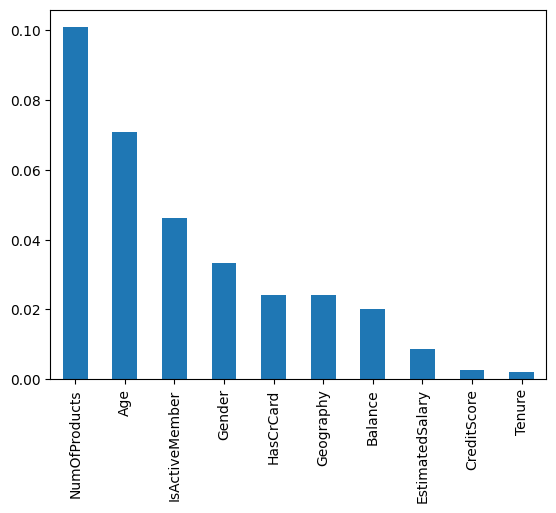

In [34]:
mutual_info = mutual_info_classif(X, y)
mi_series = pd.Series(mutual_info, index=X.columns)
mi_series.sort_values(ascending=False).plot.bar()
plt.show()

## 5.4 Regression Analysis

In [35]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4795.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:36:32   Log-Likelihood:                -65352.
No. Observations:              165034   AIC:                         1.307e+05
Df Residuals:                  165023   BIC:                         1.308e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4419      0.004    1

#### Các Biến Độc Lập và Ý Nghĩa
- **CreditScore (-0.0777):** Hệ số âm, cho thấy khi điểm tín dụng tăng, khả năng khách hàng rời khỏi dịch vụ giảm, với điều kiện các biến khác không đổi. `p-value` gần 0 cho thấy mối quan hệ này có ý nghĩa thống kê.
  
- **Geography (0.0145):** Hệ số dương, cho thấy rằng vị trí địa lý có thể ảnh hưởng đến việc rời khỏi dịch vụ. `p-value` bằng 0 cho thấy biến này có ý nghĩa thống kê.

- **Gender (0.0908):** Hệ số dương, biểu thị rằng giới tính có mối quan hệ với việc rời khỏi dịch vụ, và `p-value` gần 0 cho thấy ý nghĩa thống kê.

- **Age (0.3118):** Hệ số dương và cao nhất, cho thấy tuổi có ảnh hưởng mạnh đến việc rời khỏi dịch vụ, với khách hàng lớn tuổi có khả năng cao hơn để rời khỏi dịch vụ. `p-value` gần 0 cho thấy ý nghĩa thống kê.

- **Tenure (0.0194):** Hệ số dương, nhưng nhỏ, cho thấy thời gian làm khách hàng cũng có ảnh hưởng, nhưng không lớn. `p-value` cũng gần 0.

- **Balance (0.0661):** Hệ số dương, có nghĩa là số dư tài khoản càng cao thì khả năng rời khỏi dịch vụ càng lớn. `p-value` gần 0 cho thấy biến này có ý nghĩa thống kê.

- **NumOfProducts (-0.1134):** Hệ số âm, cho thấy số lượng sản phẩm càng cao thì khả năng rời khỏi dịch vụ càng thấp. `p-value` gần 0.

- **HasCrCard (0.0100):** Hệ số dương, nhưng nhỏ, chỉ ra rằng việc sở hữu thẻ tín dụng có ảnh hưởng rất nhỏ đến việc rời khỏi dịch vụ. `p-value` cũng gần 0.

- **IsActiveMember (-0.1536):** Hệ số âm, cho thấy khách hàng hoạt động thường xuyên có khả năng rời khỏi dịch vụ thấp hơn.

- **EstimatedSalary (0.0062):** Hệ số dương rất nhỏ, có nghĩa là thu nhập ước tính không có ảnh hưởng lớn đến việc rời khỏi dịch vụ.

### 4. **Các Thống Kê Phụ**
- **Omnibus, Prob(Omnibus), Skew, Kurtosis:** Ở đây, Prob(Omnibus) là 0.00, có nghĩa là phân phối của phần dư có thể không tuân theo phân phối chuẩn. Điều này có thể là dấu hiệu rằng mô hình chưa hoàn toàn phù hợp hoặc còn các yếu tố khác chưa được giải thích.
+ Skew là 1.013, cho thấy phân phối phần dư hơi lệch phải, có nghĩa là có nhiều phần dư dương lớn hơn phần dư âm. Điều này có thể ảnh hưởng đến hiệu quả dự báo của mô hình, vì nó cho thấy mô hình có thể chưa giải thích tốt tất cả các yếu tố ảnh hưởng đến biến mục tiêu.  
+ Kurtosis là 3.387, cao hơn 3, cho thấy phần dư có đuôi dài, nghĩa là có một số lượng nhỏ phần dư lớn đáng kể, điều này có thể dẫn đến việc mô hình bị ảnh hưởng bởi các ngoại lệ (outliers).
- **Durbin-Watson:** Durbin-Watson là 2.003, rất gần với 2, cho thấy không có tự tương quan đáng kể trong phần dư. Điều này là tốt vì nó cho thấy phần dư không có mối liên hệ tuần tự nào, và mô hình không bị ảnh hưởng bởi tự tương quan.
- **Jarque-Bera (JB) và Prob(JB):** JB = 29255.820 với Prob(JB) = 0.00, cho thấy phần dư có sự khác biệt đáng kể so với phân phối chuẩn. Điều này có thể ảnh hưởng đến hiệu quả của các suy luận thống kê từ mô hình và là dấu hiệu cho thấy mô hình chưa hoàn toàn phù hợp.

### **Kết Luận**
- Mô hình này giải thích được khoảng 22.5% phương sai của biến mục tiêu (`Exited`), cho thấy mô hình có thể không dự đoán chính xác cao.
- Một số biến có ý nghĩa thống kê cao (như `Age`, `CreditScore`, `NumOfProducts`, và `IsActiveMember`) có thể có ảnh hưởng lớn đến quyết định rời khỏi dịch vụ.
- Mặc dù một số biến có ý nghĩa thống kê, nhưng hiệu quả dự báo của mô hình có thể cần được cải thiện, chẳng hạn bằng cách thử thêm biến mới hoặc sử dụng mô hình khác.

## 5.5 Feature Selection Techniques

In [36]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X, y)
print("Selected Features: %s" % list(X.columns[fit.support_]))

Selected Features: ['Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


# VI. Build Model

## SMOTE

In [37]:
# Phân chia X và y
X = df_train.drop(columns=['Exited'])
y = df_train['Exited']

# Số lượng mẫu trước khi áp dụng SMOTE
print("Before SMOTE:")
print(y.value_counts())

# Áp dụng SMOTE để cân bằng biến mục tiêu
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Số lượng mẫu sau khi áp dụng SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Chuyển đổi X_resampled và y_resampled thành DataFrame
X = pd.DataFrame(X_resampled, columns=X.columns)
y = pd.DataFrame(y_resampled, columns=['Exited'])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Before SMOTE:
Exited
0    130113
1     34921
Name: count, dtype: int64

After SMOTE:
Exited
0    130113
1    130113
Name: count, dtype: int64


## 6.1 Voting Ensemble

In [38]:
results = []

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:39:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  w

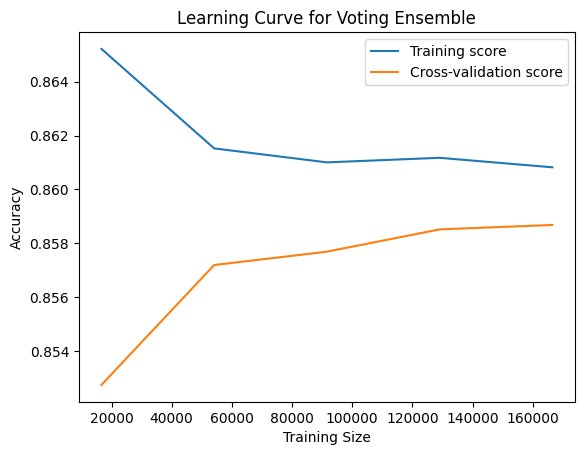

In [39]:
# Define individual models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Add each model to the VotingClassifier
voting_clf = VotingClassifier(estimators=list(models.items()), voting='soft')

# Training and evaluation
start_time = time.time()
voting_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions and evaluation
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Metrics
# Tính toán các chỉ số
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_pr, precision_pr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Append results
results.append({
    "Model": "Voting Ensemble",
    "Accuracy": acc,
    "F1 Score": f1,
    "Precision": precision,
    "Recall": recall,
    "Log Loss": log_loss_val,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc,
    "Cohen's Kappa": kappa,
    "MCC": mcc,
    "Training Time (s)": training_time,
    "Confusion Matrix": conf_matrix
})

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Voting Ensemble')
plt.legend()
plt.show()


## 6.2 Stacking Ensemble

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  w

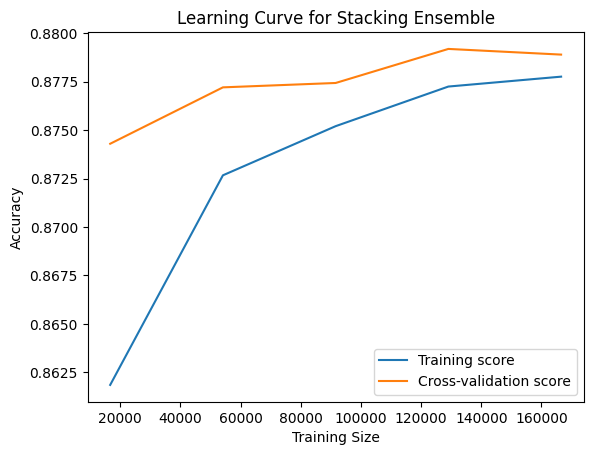

In [40]:
# Define base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Training and evaluation
start_time = time.time()
stacking_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions and evaluation
y_pred = stacking_clf.predict(X_test)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Metrics
# Tính toán các chỉ số
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_pr, precision_pr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Append results
results.append({
    "Model": "Stacking Ensemble",
    "Accuracy": acc,
    "F1 Score": f1,
    "Precision": precision,
    "Recall": recall,
    "Log Loss": log_loss_val,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc,
    "Cohen's Kappa": kappa,
    "MCC": mcc,
    "Training Time (s)": training_time,
    "Confusion Matrix": conf_matrix
})

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Stacking Ensemble')
plt.legend()
plt.show()


## 6.3 Boosting Ensemble

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


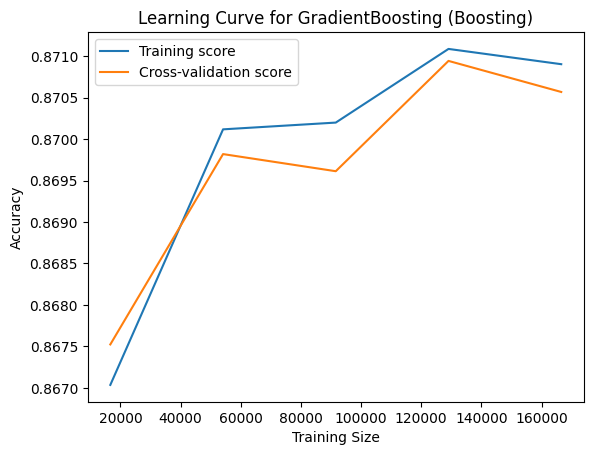

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


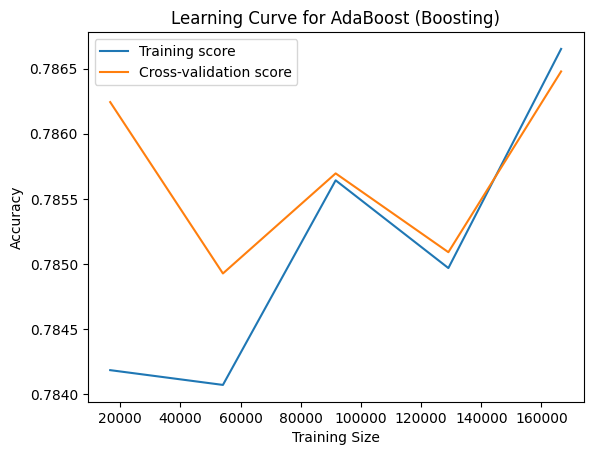

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


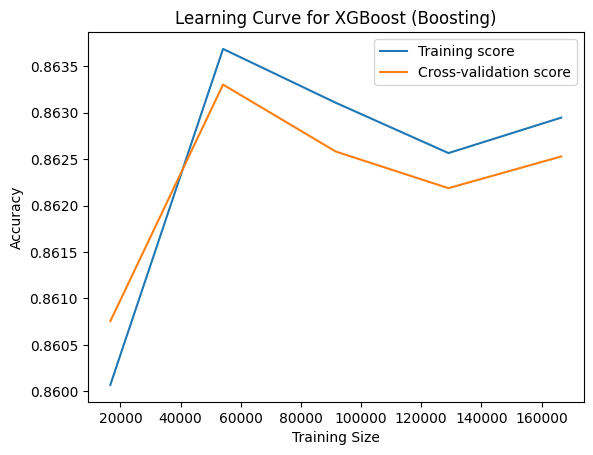

In [41]:


boosting_models = {
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for model_name, model in boosting_models.items():
    # Training and evaluation
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predictions and evaluation
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    # Tính toán các chỉ số
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    log_loss_val = log_loss(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_pr, precision_pr)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append results
    results.append({
        "Model": model_name + " (Boosting)",
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Log Loss": log_loss_val,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Cohen's Kappa": kappa,
        "MCC": mcc,
        "Training Time (s)": training_time,
        "Confusion Matrix": conf_matrix
    })

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name} (Boosting)')
    plt.legend()
    plt.show()


## 6.4  Bagging Ensemble

In [ ]:


# Define multiple base estimators
base_estimators = [
    ('ada', AdaBoostClassifier()),
    ('gra', GradientBoostingClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('cat', CatBoostClassifier(verbose=0)),
    ('lgbm', LGBMClassifier())
]

# Create the bagging classifier with initial parameters
bagging = BaggingClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator': [est[1] for est in base_estimators],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.3, 0.5, 0.7],
    'max_features': [0.3, 0.5, 0.7]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Training and tuning with GridSearchCV
start_time = time.time()
grid.fit(X_train, y_train)
training_time = time.time() - start_time

# Print the best parameters and best score
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation accuracy: ", grid.best_score_)

# Get the best estimator
best_bagging = grid.best_estimator_

# Predict and evaluate
y_pred = best_bagging.predict(X_test)
y_proba = best_bagging.predict_proba(X_test)[:, 1]

# Metrics
# Tính toán các chỉ số
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_pr, precision_pr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Append results to the results list
results.append({
    "Model": "Bagging Ensemble",
    "Accuracy": acc,
    "F1 Score": f1,
    "Precision": precision,
    "Recall": recall,
    "Log Loss": log_loss_val,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc,
    "Cohen's Kappa": kappa,
    "MCC": mcc,
    "Training Time (s)": training_time,
    "Confusion Matrix": conf_matrix
})

# Plot learning curve for the best Bagging model
train_sizes, train_scores, test_scores = learning_curve(best_bagging, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Best Bagging Model')
plt.legend()
plt.show()


## 6.5 NN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7368 - loss: 0.5287 - val_accuracy: 0.7964 - val_loss: 0.4362
Epoch 2/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7912 - loss: 0.4518 - val_accuracy: 0.7957 - val_loss: 0.4366
Epoch 3/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7911 - loss: 0.4473 - val_accuracy: 0.7972 - val_loss: 0.4351
Epoch 4/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7923 - loss: 0.4464 - val_accuracy: 0.7952 - val_loss: 0.4375
Epoch 5/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7917 - loss: 0.4461 - val_accuracy: 0.7991 - val_loss: 0.4329
Epoch 6/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7925 - loss: 0.4451 - val_accuracy: 0.7981 - val_loss: 0.4332
Epoch 7/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7945 - loss: 0.4442 - val_accuracy: 0.7986 - val_loss: 0.4335
Epoch 8/100
6506/6506 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7957 -

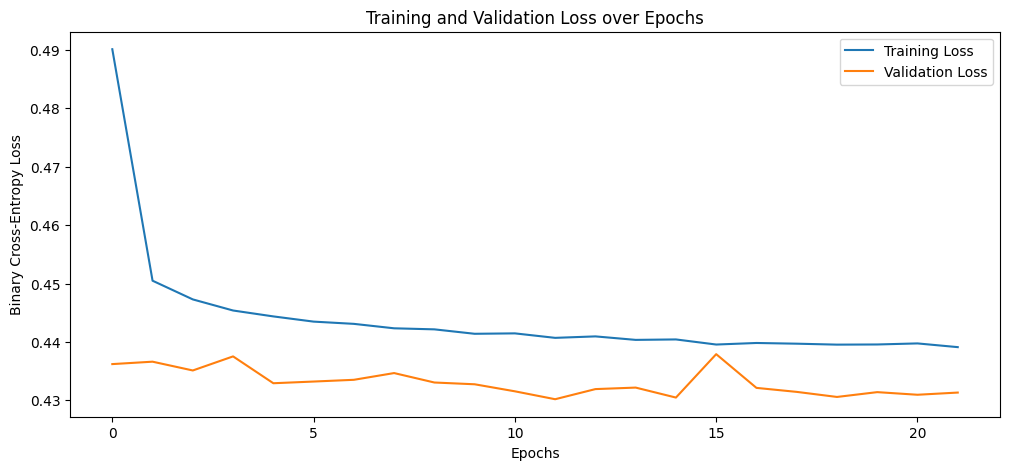

In [42]:


# Define the MLP model
def create_mlp(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile the model
model = create_mlp(X_train.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training and evaluation
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)
training_time = time.time() - start_time

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_proba = model.predict(X_test)

# Metrics
# Tính toán các chỉ số
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
log_loss_val = log_loss(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
precision_pr, recall_pr, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall_pr, precision_pr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Append results
results.append({
    "Model": "Deep Learning (MLP)",
    "Accuracy": acc,
    "F1 Score": f1,
    "Precision": precision,
    "Recall": recall,
    "Log Loss": log_loss_val,
    "ROC AUC": roc_auc,
    "PR AUC": pr_auc,
    "Cohen's Kappa": kappa,
    "MCC": mcc,
    "Training Time (s)": training_time,
    "Confusion Matrix": conf_matrix
})


# Plot learning curve
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [44]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score,Precision,Recall,Log Loss,ROC AUC,PR AUC,Cohen's Kappa,MCC,Training Time (s),Confusion Matrix
0,Voting Ensemble,0.859586,0.858531,0.865535,0.851640,0.401743,0.933568,0.935572,0.719174,0.719267,79.178598,"[[22563, 3445], [3863, 22175]]"
1,Stacking Ensemble,0.880817,0.878150,0.898790,0.858438,0.287542,0.947354,0.957099,0.761640,0.762410,376.190431,"[[23491, 2517], [3686, 22352]]"
2,GradientBoosting (Boosting),0.872536,0.869957,0.888453,0.852216,0.319302,0.944923,0.950787,0.745078,0.745699,33.691506,"[[23222, 2786], [3848, 22190]]"
3,AdaBoost (Boosting),0.787361,0.793013,0.772905,0.814195,0.647711,0.868610,0.868169,0.574709,0.575532,14.445505,"[[19779, 6229], [4838, 21200]]"
4,XGBoost (Boosting),0.864447,0.861365,0.881936,0.841731,0.333032,0.938095,0.944066,0.728901,0.729660,0.830974,"[[23074, 2934], [4121, 21917]]"
5,Deep Learning (MLP),0.800158,0.797168,0.809754,0.784968,0.430191,0.883320,0.880593,0.600322,0.600604,351.019938,"[[21206, 4802], [5599, 20439]]"


- Lựa chọn mô hình Stacking Ensemble để làm, phân tích sâu hơn vì sự tối ưu mặc dù thời gian hơi lớn


# VII. SHAP VALUE and PDP

## 7.1 Shap Value

In [45]:
!pip install shap

In [48]:
import shap
shap.initjs()

explainer = shap.Explainer(stacking_clf)
shap_values = explainer.shap_values(X_test)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('ada',
                                AdaBoostClassifier(learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())